
<img src="https://fs-prod-cdn.nintendo-europe.com/media/images/10_share_images/games_15/nintendo_switch_4/H2x1_NSwitch_AnimalCrossingNewHorizons.jpg" style="width:80%"></img>
<h1 style="color:#40E0D0;font-size:60px;"><strong>About</strong> <strong style="color:#00FF7F">Animal Crossing: </strong></h1> 
<p> Animal Crossing: New Horrizons is a social media game developed in 2012 and published in 2020 by Ninetendo specifically for the Ninetendo Switch consoles. In New Horizons, the player controls a character who moves to a deserted island after purchasing a getaway package from Tom Nook (That honestly doesn't sound too bad..where can I get one of these packages?). Tom Nook presents you of some layouts of different islands, you will get to choose and eventually develop how ever you choose. You'll be able to gather and craft items, customize your island, and recruit animals from other islands to move to your island to develop a community (I was really excited about crafting and fishing.. I don't know what excites me about fishing in game but it's so fun).


<h1 style="color:#40E0D0;font-size:60px;"><strong>Objective: </strong><strong style="color:#00FF7F">The Most profitable recipes  </strong></h1> 
<img src="https://play.nintendo.com/images/AC_Tom_FRYtwIN.17345b1513ac044897cfc243542899dce541e8dc.9afde10b.png" style="width:20%"></img>

<p>In Animal Crossing: New Horizons, you can sell the items you collect for bells (in game currency) or craft them into new items. Since I like to min-max the way I play my games, I wanted to know if there were any craftables that sell for more than their parts. So, this is what we're going to find out.</p>

## <h1 style="color:#40E0D0;font-size:40px;"><strong>Inspecting the </strong><strong style="color:#00FF7F">Data</strong></h1> 
We're going to import the "recipes" table, and slice it so that we have the recipe name, the materials list, and the sell price of the item.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

recipes = pd.read_csv('/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/recipes.csv')
rp = recipes.iloc[:,0:15]
rp.head(5)

,Name,#1,Material 1,#2,Material 2,#3,Material 3,#4,Material 4,#5,Material 5,#6,Material 6,Buy,Sell
0,acorn pochette,6,acorn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200
1,acoustic guitar,8,softwood,3.0,iron nugget,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200
2,angled signpost,2,hardwood,3.0,softwood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200
3,apple chair,10,apple,4.0,wood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200
4,apple dress,8,apple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200


Note that we do have the Buy column, but our calculations will basically ignore it.

## <h1 style="color:#40E0D0;font-size:40px;"><strong>Materials </strong><strong style="color:#00FF7F">Function</strong></h1> 
Now let's write a function that returns the material list and sell price for a given recipe.

In [ ]:
def get_materials(item_name):
    # Slice the table for the item we want.
    material_list = rp[rp['Name'] == item_name]
    
    # Initialize dictionary and iterator
    material_dict = {}
    i = 0
    
    # Iterate over the material and quantity columns
    # The material name is our key, the quantity is our value to that key
    while i < 6:
        material_dict[material_list.iloc[0,i*2+2]] = material_list.iloc[0,i*2+1]
        i += 1
    
    # Get rid of the nan value keys since we don't need them.
    if np.nan in material_dict:
        material_dict.pop(np.nan)
    
    # Clean our 'Sell' value so that it is an integer, not an array.
    material_dict['Sell'] = material_list['Sell'].values.sum()
    return material_dict

print(get_materials('tire toy'))
print(get_materials('barrel'))

{'old tire': 1, 'Sell': 200}
{'wood': 5, 'iron nugget': 2.0, 'Sell': 200}


As you can see, this function will return a dictionary containing the materials and sell prices of our recipe items.

## <h1 style="color:#40E0D0;font-size:40px;"><strong>Difference between </strong><strong style="color:#00FF7F">sell price and materials price</strong></h1> 
Now we need to make a function that returns the difference between the recipe sell price with the sum of the sell prices of the materials. If the result is positive, then it is more profitable to sell the crafted recipe than to sell all the materials separately and vicaversa.

In [ ]:
# Import the data for the raw materials
mat = pd.read_csv('/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/other.csv')

# Function for calculating difference between sell price and sell price of all materials in recipe.
def materials_diff(item_name):
    # Run the get_materials function to create dictionary
    mat_dict = get_materials(item_name)
    
    # Initialize sell prices
    mat_price = 0
    sell_price = 0
    
    for key, val in mat_dict.items():
        # The sell price becomes the same as sell_price (integer only)
        if key == 'Sell':
            sell_price = val.sum()
        
        # The materials in our dictionary are matched to the Sell prices in our raw materials table.
        # Material prices are multiplied by the quantity (values) from the dictionary to get total raw material sell price.
        else:
            material_cost = mat[mat["Name"] == key]['Sell'].values.sum()
            mat_price = mat_price + material_cost * val
    return sell_price-mat_price

print(materials_diff('tire toy'))
print(materials_diff('barrel'))

190.0
-850.0


It looks like the tire toy might be an item we would want to craft to sell. The barrel, not so much.

## <h1 style="color:#40E0D0;font-size:40px;"><strong>Convert it </strong><strong style="color:#00FF7F">into tables</strong></h1> 
Now we'll use list comprehension to iterate over a list of recipe names and calculate the craft-to-sell profit for each recipe.

In [ ]:
# Generate recipe name list
name_list = list(rp.Name)

# Iterate over recipe name list to create a list of craft-to-sell profit margins.
craft_profit = [materials_diff(x) for x in name_list]

# Make this list a column and check table
rp['craft_profit'] = craft_profit
rp.head(5)

,Name,#1,Material 1,#2,Material 2,#3,Material 3,#4,Material 4,#5,Material 5,#6,Material 6,Buy,Sell,craft_profit
0,acorn pochette,6,acorn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200,-1000.0
1,acoustic guitar,8,softwood,3.0,iron nugget,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200,-1405.0
2,angled signpost,2,hardwood,3.0,softwood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200,-100.0
3,apple chair,10,apple,4.0,wood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200,-5040.0
4,apple dress,8,apple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200,-3800.0


In [ ]:
# Make a new table only containing profitable recipes.
profitable_recipes = rp[rp['craft_profit'] > 0].sort_values(by=['craft_profit'], ascending=False)
profitable_recipes

,Name,#1,Material 1,#2,Material 2,#3,Material 3,#4,Material 4,#5,Material 5,#6,Material 6,Buy,Sell,craft_profit
397,pile of zen cushions,3,zen cushion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200,200.0
201,giant teddy bear,1,Papa bear,1.0,Mama bear,1.0,Baby bear,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200,200.0
464,small cardboard boxes,2,cardboard box,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200,200.0
290,large cardboard boxes,5,cardboard box,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200,200.0
473,stacked magazines,6,magazine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,old-fashioned washtub,3,softwood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200,20.0
310,log decorative shelves,2,log bench,3.0,hardwood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200,20.0
56,boomerang,3,hardwood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200,20.0
53,bone doorplate,3,softwood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NFS,200,20.0


Now that we have this list, let's consider some limitations:
* If the materials for a recipe were not in the "other.csv" file, the craft-to-sell profit will simply equal the sell price of the recipe.
* Even if we included all item data here, the function does not do a good job of accounting for items crafted from items (such as wooden-block furniture). It can only show if it is more or less profitable to sell a given recipe after crafting it or immediately before assuming all materials are present.

While understanding that we likely have some skewed data, let's just check the profit distribution from our new item list.

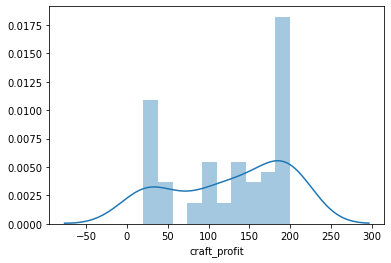

In [ ]:
sns.distplot(profitable_recipes['craft_profit'], bins=10)
plt.show()

OK, so it looks like there's many items that sell for very little profit and many that sell for more (but probably should not be included in the data).

Lets compare this to insects and fish, which are far more common as sellable items.

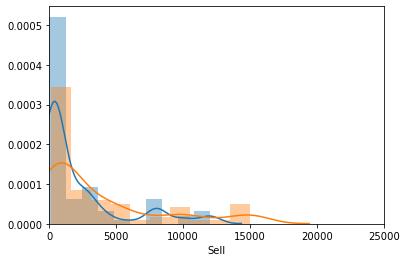

In [ ]:
ins = pd.read_csv('/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/insects.csv')
fish = pd.read_csv('/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/fish.csv')
sns.distplot(ins['Sell'], bins=10)
sns.distplot(fish['Sell'], bins=10)
plt.xlim(0, 25000)
plt.show()



While there's a strong skew towards cheaper items, we can tell that the sell prices for fish and insects is, on average, considerably higher than our "profitable" craftables.

## <h1 style="color:#40E0D0;font-size:40px;"><strong>Concl</strong><strong style="color:#00FF7F">usion</strong></h1> 
The normal ways of generating income (i.e. catching small creatures, harvesting fruit, playing the stalk market) are far more profitable than trying to use the DIY system to generate profit.






<img src="https://d1fs8ljxwyzba6.cloudfront.net/assets/article/2020/03/23/how-to-get-bells-quickly-animal-crossing-new-horizons-header_feature.jpg" style="width:50%"></img>